In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
file_date_str = '101922'
subject_id_filter = 'DS_STARFISH_2223_27'
file_path = f"./Synched_Data_GR0_22_DEN_MAXZ1_25/GR/GR_data (Version 3)/DAYGR_{file_date_str}_GR0_22_DEN_081724_V21874854045.csv"
data = pd.read_csv(file_path, header=None, names=["SUBJECTID", "TIME", "X", "Y", "Z"])
filtered_data = data[data['SUBJECTID'].str.contains(subject_id_filter)]

In [38]:
print(filtered_data.head())
print(filtered_data.shape)

                     SUBJECTID                     TIME         X         Y  \
Location  DS_STARFISH_2223_27L  2022-10-19 09:40:03.000  9.863869  6.092836   
Location  DS_STARFISH_2223_27R  2022-10-19 09:40:03.000  8.999499  7.030370   
Location  DS_STARFISH_2223_27L  2022-10-19 09:40:03.100  9.851512  6.122486   
Location  DS_STARFISH_2223_27R  2022-10-19 09:40:03.100  9.018915  7.024822   
Location  DS_STARFISH_2223_27L  2022-10-19 09:40:03.200  9.834989  6.156746   

                 Z  
Location  1.068081  
Location  1.052888  
Location  1.087642  
Location  1.037803  
Location  1.107203  
(159030, 5)


In [57]:
start_time = '2022-10-19 10:20:00.000'
filtered_data = filtered_data.reset_index(drop=True)
start_match = filtered_data[filtered_data["TIME"] == start_time]
start_index = start_match.index[0]
print(start_match)
print(start_index)

                  SUBJECTID                     TIME         X         Y  \
46350  DS_STARFISH_2223_27L  2022-10-19 10:20:00.000  1.244145  0.532389   
46351  DS_STARFISH_2223_27R  2022-10-19 10:20:00.000  2.171766  2.745692   

              Z                  DATETIME  
46350  0.887395 2022-10-19 10:20:00-19:00  
46351  1.126466 2022-10-19 10:20:00-19:00  
46350


In [66]:
plot_data = filtered_data.iloc[start_index:start_index+2000]
df_left = plot_data[plot_data["SUBJECTID"].str.endswith('L')]
df_right = plot_data[plot_data["SUBJECTID"].str.endswith('R')]
lr_diff = df_left['X'] - df_right['X']
print(df_right['X'].head())
print(type(df_right['X']))
print(lr_diff.head())
# plt.hist(lr_diff, bins=100)
# plt.xlabel("Left - Right X Position Difference")
# plt.ylabel("Frequency")
# plt.title("Histogram of Left - Right X Position Difference")

46351    2.171766
46353    2.174490
46355    2.176524
46357    2.177935
46359    2.178790
Name: X, dtype: float64
<class 'pandas.core.series.Series'>
46350   NaN
46351   NaN
46352   NaN
46353   NaN
46354   NaN
Name: X, dtype: float64


/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46923/3233724280.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df_left['X'], df_left['Y'], 'bo-', label="Left Device", linestyle='-', marker='o')
/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46923/3233724280.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df_left['X'], df_left['Y'], 'bo-', label="Left Device", linestyle='-', marker='o')
/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46923/3233724280.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df_right['X'], df_right['Y'], 'ro-', label="Right Devi

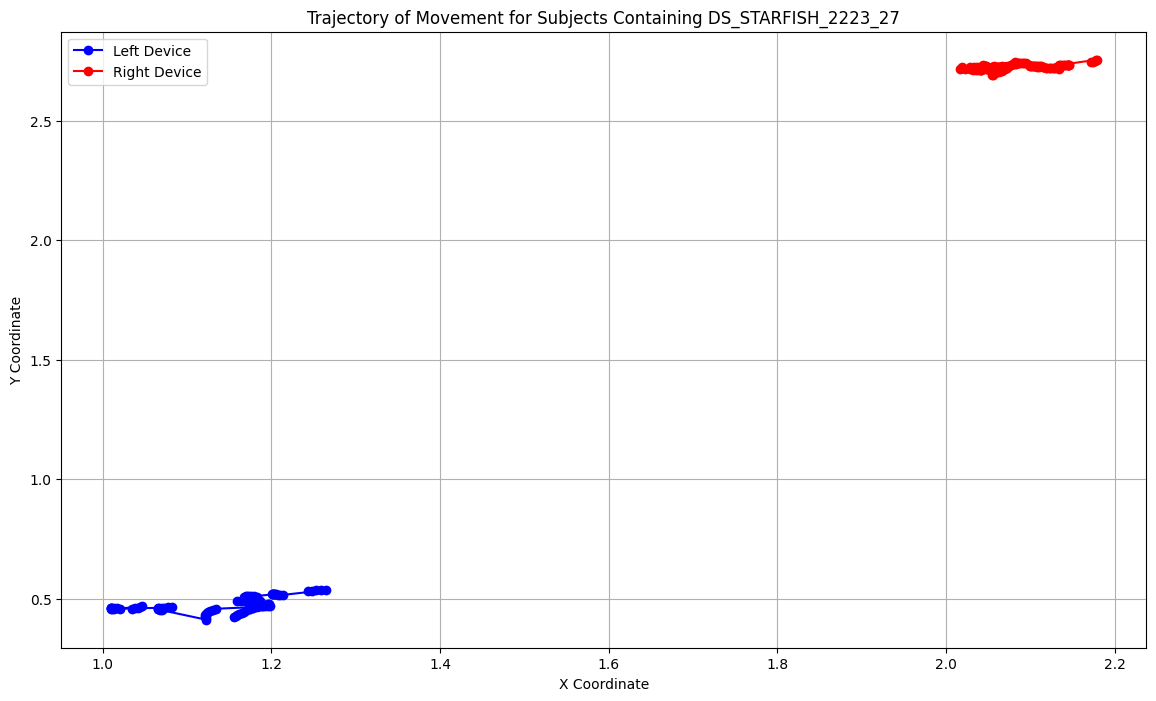

Total data points: 200
Left device points: 100
Right device points: 100

First few rows of left device data:
                          TIME         X         Y
46350  2022-10-19 10:20:00.000  1.244145  0.532389
46352  2022-10-19 10:20:00.100  1.248491  0.533594
46354  2022-10-19 10:20:00.200  1.253527  0.534574
46356  2022-10-19 10:20:00.300  1.259185  0.535359
46358  2022-10-19 10:20:00.400  1.265400  0.535980

First few rows of right device data:
                          TIME         X         Y
46351  2022-10-19 10:20:00.000  2.171766  2.745692
46353  2022-10-19 10:20:00.100  2.174490  2.747797
46355  2022-10-19 10:20:00.200  2.176524  2.750126
46357  2022-10-19 10:20:00.300  2.177935  2.752650
46359  2022-10-19 10:20:00.400  2.178790  2.755338


In [58]:
plot_data = filtered_data.iloc[start_index:start_index+200]

df_left = plot_data[plot_data["SUBJECTID"].str.endswith('L')]
df_right = plot_data[plot_data["SUBJECTID"].str.endswith('R')]

plt.figure(figsize=(14, 8))
plt.plot(df_left['X'], df_left['Y'], 'bo-', label="Left Device", linestyle='-', marker='o')
plt.plot(df_right['X'], df_right['Y'], 'ro-', label="Right Device", linestyle='-', marker='o')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Trajectory of Movement for Subjects Containing {subject_id_filter}")
plt.legend()
plt.grid(True)
plt.show()

print(f"Total data points: {len(plot_data)}")
print(f"Left device points: {len(df_left)}")
print(f"Right device points: {len(df_right)}")
print("\nFirst few rows of left device data:")
print(df_left[['TIME', 'X', 'Y']].head())
print("\nFirst few rows of right device data:")
print(df_right[['TIME', 'X', 'Y']].head())


/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46923/1916407171.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df_left['X'], df_left['Y'], 'bo-', label="Left Device", linestyle='-', marker='o')
/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46923/1916407171.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df_left['X'], df_left['Y'], 'bo-', label="Left Device", linestyle='-', marker='o')
/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46923/1916407171.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df_right['X'], df_right['Y'], 'ro-', label="Right Devi

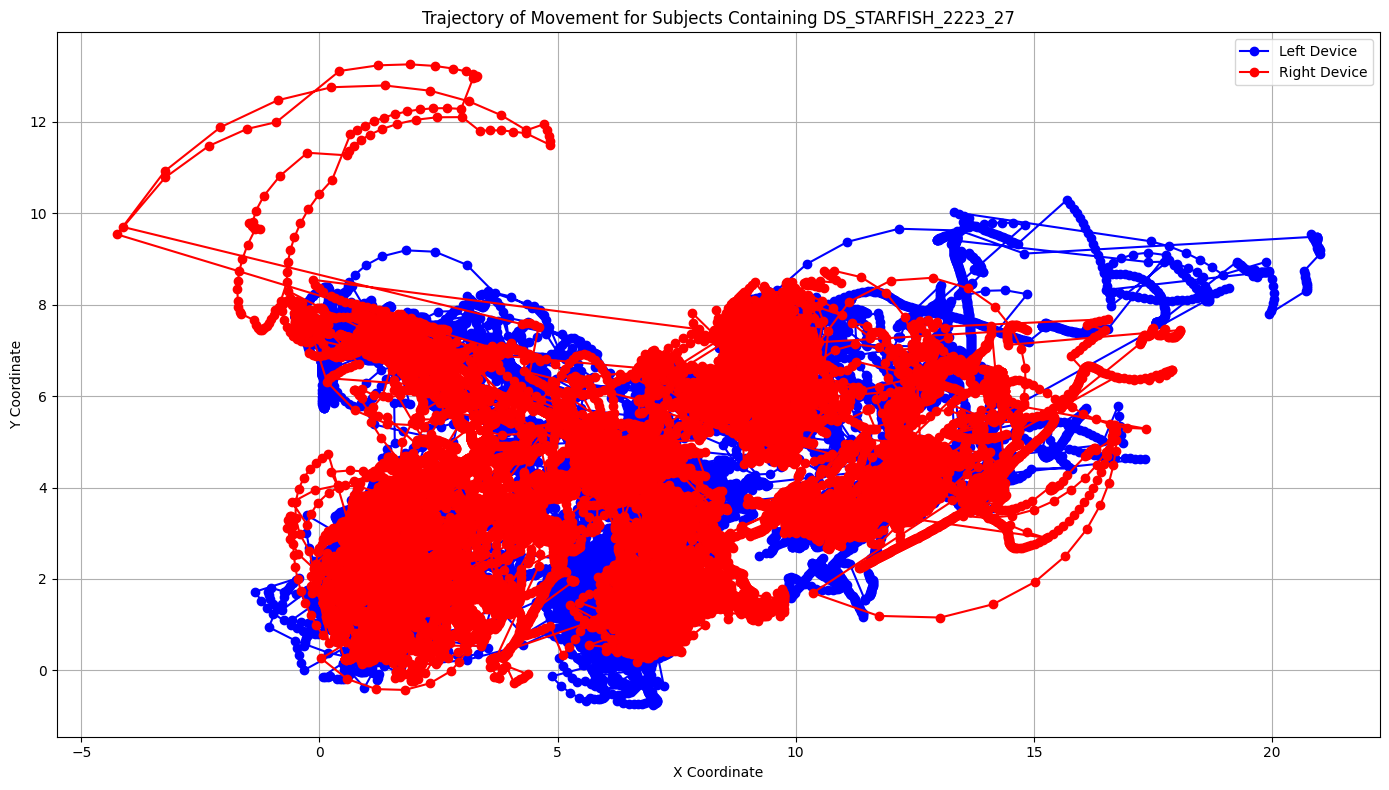

In [ ]:
df_left = data[data['SUBJECTID'].str.endswith('L')]
df_right = data[data['SUBJECTID'].str.endswith('R')]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot trajectories
plt.plot(df_left['X'], df_left['Y'], 'bo-', label="Left Device", linestyle='-', marker='o')
plt.plot(df_right['X'], df_right['Y'], 'ro-', label="Right Device", linestyle='-', marker='o')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Trajectory of Movement for Subjects Containing {subject_id_filter}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46843/2384390277.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df_left["X"], df_left["Y"], 'bo-', label="Left Device", linestyle='-', marker='o')
/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46843/2384390277.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df_left["X"], df_left["Y"], 'bo-', label="Left Device", linestyle='-', marker='o')
/var/folders/p3/w6bdbvgx3qg4dgmll4zcxg_r0000gn/T/ipykernel_46843/2384390277.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df_right["X"], df_right["Y"], 'ro-', label="Right Devi

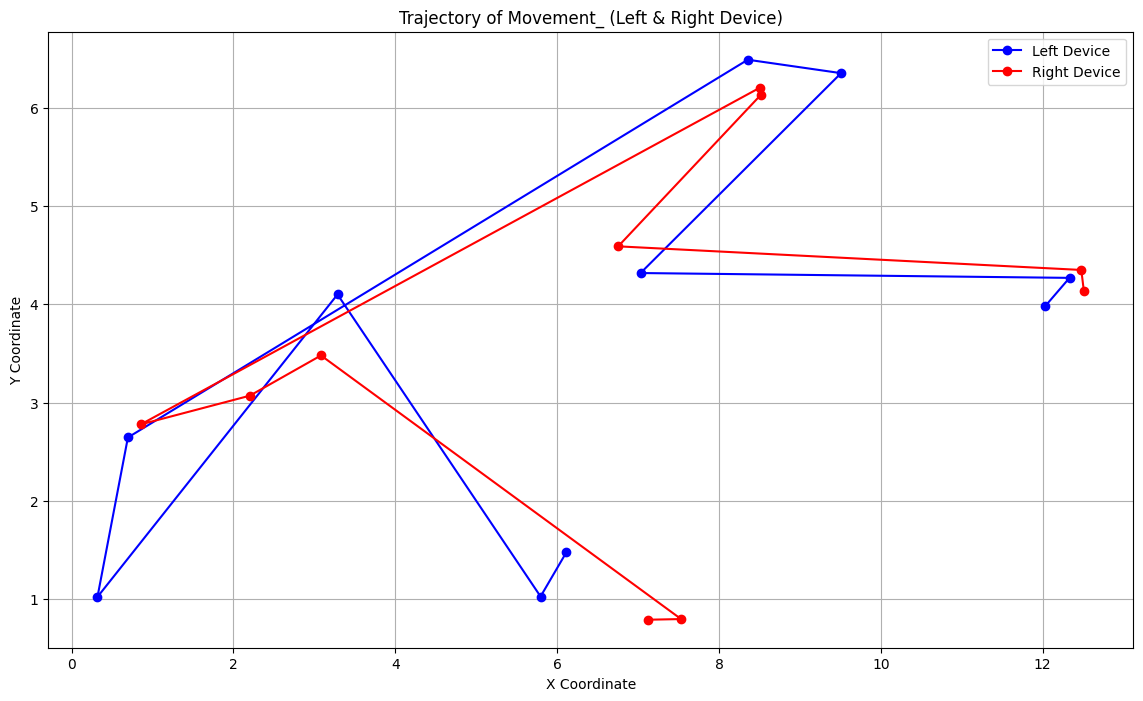

In [15]:
sampled_times = data["TIME"].sample(min(10, len(data)), random_state=50)
sampled_data = data[data["TIME"].isin(sampled_times)]

df_left = sampled_data[sampled_data["SUBJECTID"].str.endswith("27L")]
df_right = sampled_data[sampled_data["SUBJECTID"].str.endswith("27R")]

plt.figure(figsize=(14, 8))
plt.plot(df_left["X"], df_left["Y"], 'bo-', label="Left Device", linestyle='-', marker='o')
plt.plot(df_right["X"], df_right["Y"], 'ro-', label="Right Device", linestyle='-', marker='o')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Trajectory of Movement_ (Left & Right Device)")
plt.legend()
plt.grid()
plt.show()

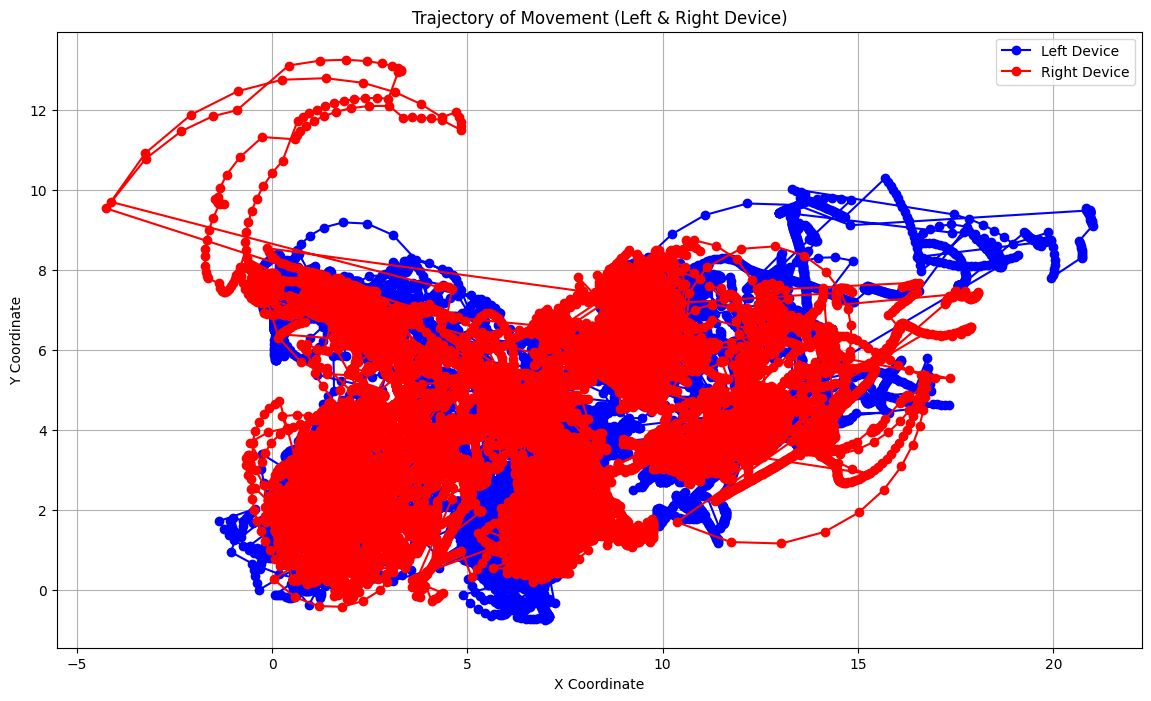

In [6]:
df_left = data[data["SUBJECTID"].str.endswith("27L")]
df_right = data[data["SUBJECTID"].str.endswith("27R")]
plt.figure(figsize=(14, 8))
plt.plot(df_left["X"], df_left["Y"], 'bo-', label="Left Device")
plt.plot(df_right["X"], df_right["Y"], 'ro-', label="Right Device")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Trajectory of Movement (Left & Right Device)")
plt.legend()
plt.grid()
plt.show()
